Ranmdom forest model

tenemos datos de un vino, acidity, sugar, etc y hay que saber si ese vino es bueno o no


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
winedf= pd.read_csv('files/winequality-red.csv')
winedf.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [3]:
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

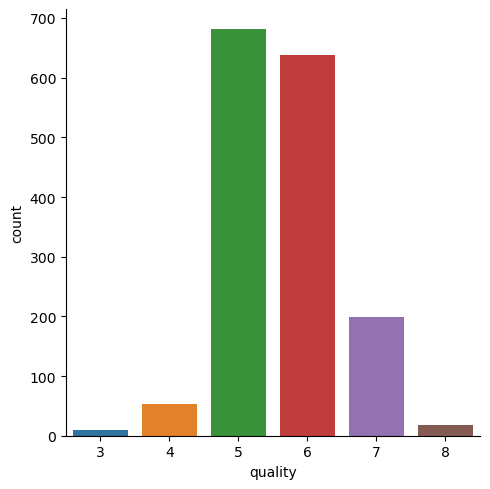

In [4]:
#number od the values of each qualities
sns.catplot(x='quality', data =winedf, kind='count')

tenemos cuality de 3 a 8

<Axes: xlabel='quality', ylabel='volatile acidity'>

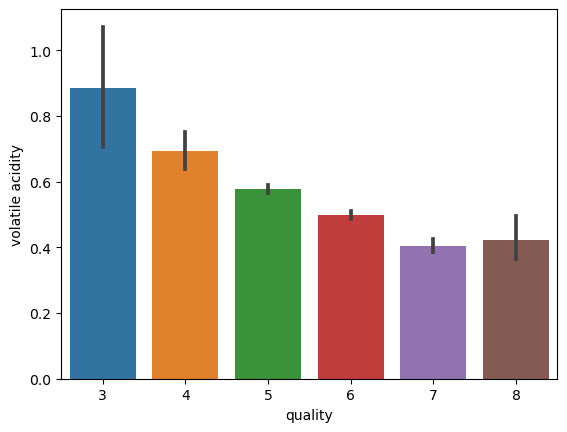

In [4]:
#volatile acidity vs quality

sns.barplot(data=winedf, x="quality", y="volatile acidity")



ahora grafico con seabonr de quality y citric acid
2



In [5]:
correlation = winedf.corr()

<Axes: >

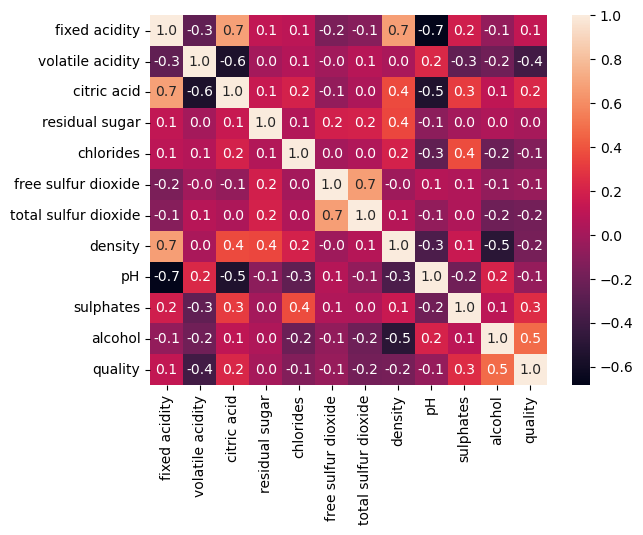

In [6]:
sns.heatmap(correlation, annot=True, fmt=".1f")

In [7]:
X= winedf.drop('quality', axis=1)


In [8]:
#la cuilidad de 3,4,5,6,7,8 pasarlo a dos valores
Y= winedf['quality'].apply(lambda y_value:1 if y_value >= 7 else 0)
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int64

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, stratify=Y, random_state=2)
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [13]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
#model evaluation
X_test_prediction =model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.915625

In [33]:
#prueba con datos diferentes si me da 0 malo o 1 bueno,
input_data =[9.6,0.32,0.47,1.4,0.055999999999999994,9.0,24.0,0.99695,3.22,0.82,10.3]
input_data= np.asarray(input_data)
input_data= input_data.reshape(1,-1)
input_data

array([[ 9.6    ,  0.32   ,  0.47   ,  1.4    ,  0.056  ,  9.     ,
        24.     ,  0.99695,  3.22   ,  0.82   , 10.3    ]])

In [32]:
prediction = model.predict(input_data)
print (prediction)

[1]


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
